In [1]:
import re
import time

import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Step 1: Read CSV

To save typos in the future, we first convert a string that is camelcase into snake_case. Use underscores to avoid spaces in between of compound words.

In [2]:
def camel_to_snake(column_name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', column_name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

def read(file_name):
    if not os.path.isfile(file_name):
        raise ValueError('File Not Found')
        
    ext = file_name.split('.')[-1].lower()
    if 'csv' == ext:
        df = pd.read_csv(file_name)
    elif 'xls' in ext:
        df = pd.read_excel(file_name)
    elif 'json' == ext:
        df = pd.read_json(file_name)
    else:
        raise ValueError('Only support csv, xls and json')

    return df

## Merge on projectid

Basic description: Projects data lists the demographics data of school profiles and associated socio-economic factors, and the project applications data. Outcomes data lists the outcomes(whether it is exciting or not) for each project. To be exciting, a project must meet all of the top five criteria,and meet at least one extra criteria. Donations data comprises donors information and donation details associated with each individual project. Essays data conclude all essay questions funding application materials. Resources data specifies those who requested resources. 

Data choosing criteria: Since the natural language processing is beyond the scope of the project, we will rule 'Essays' dataset out of our analysis.  

Merging purpose: Merging is the first step to explore and pre-process data. For this step, I see Projects.csv as the master dataset, and merge outcomes, donations and resources datasets on projects dataset. By browsing the head of these dataset, we found the projectid could be used as primary key to merge data as it is the unique identification number that link all these four datasets together. 

In [3]:
df_project = pd.read_csv('/home/xinyuan/projects.csv', index_col='projectid')
df_outcome = pd.read_csv('/home/xinyuan/outcomes.csv', index_col='projectid')
df_donation = pd.read_csv('/home/xinyuan/donations.csv', index_col='projectid')
df_resource = pd.read_csv('/home/xinyuan/resources.csv', index_col='projectid')

In [4]:
df_origin = df_project.join(df_outcome)
df_origin = df_origin.join(df_donation)
df_origin = df_origin.join(df_resource)
df_origin.columns = [camel_to_snake(col) for col in df_origin.columns]
df_origin.head()

,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,school_district,...,for_honoree,donation_message,resourceid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,b3af2be825736f6d530314ae70e7c16c,767.0,Lakeshore Learning Materials,Supplies,CG582 - Adjustable Apron - Red,CG582,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,72f084e8c03ce9b3eff6e59de0476ef8,767.0,Lakeshore Learning Materials,Supplies,FF534 - Tissue Paper Squares,FF534,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,c2ea7ecbc583410fcec74c87ff102299,767.0,Lakeshore Learning Materials,Supplies,LM941 - Kid Counters,LM941,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,06d48fb6646b17eea8dd7e5fdd9a6178,767.0,Lakeshore Learning Materials,Supplies,LC987 - Newsprint Easel Paper - 16&amp;#34; x ...,LC987,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,60609.0,urban,Pershing Elem Network,...,f,I gave because my students are AWESOME and the...,aac3650483a9c0a6614ebccc6c6ced90,767.0,Lakeshore Learning Materials,Supplies,LA743 - Glitter Pack - Set of 12,LA743,12.99,2.0


# Step 2：Explore Data

## 2.1 Basic info

In [5]:
df = df_origin
df.count()

teacher_acctid                              19044197
schoolid                                    19044197
school_ncesid                               17580019
school_latitude                             19044197
school_longitude                            19044197
school_city                                 19044197
school_state                                19044197
school_zip                                  19044182
school_metro                                16923956
school_district                             19014316
school_county                               19044141
school_charter                              19044197
school_magnet                               19044197
school_year_round                           19044197
school_nlns                                 19044197
school_kipp                                 19044197
school_charter_ready_promise                19044197
teacher_prefix                              19044186
teacher_teach_for_america                   19

## 2.2 Data discriptions

In this section, we want know the distributions of these variables, and correlations between these variables, as well as the changes and trends over time.

## 2.2.1 Distributions of different variables

From literature review, TFA teachers, charter schools, magnet schools and poverty level are terminologies that always appear in the paper of low income education. We would like to examine the distributions of these variables.

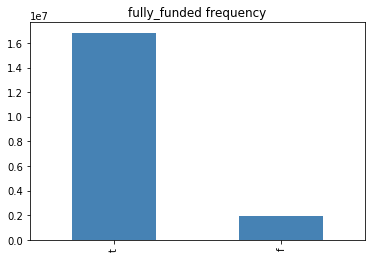

In [6]:
df['fully_funded'].value_counts().plot.bar(title = "fully_funded frequency", color = "steelblue")

In [118]:
ratio = df["total_price_including_optional_support"].value_counts(normalize = True)
ratio

7166.69    1.574162e-03
3201.26    1.342628e-03
900.32     7.200647e-04
568.29     6.719538e-04
565.85     6.075926e-04
567.07     5.810420e-04
569.51     5.733647e-04
527.05     5.006865e-04
563.41     4.628119e-04
553.66     4.251933e-04
562.20     4.179638e-04
532.93     3.979389e-04
3312.28    3.941003e-04
1489.04    3.930767e-04
4334.12    3.885982e-04
560.98     3.795774e-04
539.02     3.790656e-04
674.39     3.506597e-04
3114.04    3.493162e-04
534.15     3.370965e-04
554.88     3.358809e-04
690.89     3.353691e-04
551.22     3.276918e-04
514.63     3.267322e-04
503.66     3.187350e-04
837.51     3.168797e-04
556.10     3.076030e-04
564.63     3.066433e-04
552.44     3.017170e-04
5110.42    2.981983e-04
               ...     
4315.00    6.397732e-08
85.09      6.397732e-08
344.10     6.397732e-08
3460.79    6.397732e-08
852.57     6.397732e-08
1263.79    6.397732e-08
1552.75    6.397732e-08
1226.96    6.397732e-08
1362.44    6.397732e-08
2339.94    6.397732e-08
2338.94    6.397

In [119]:
df.groupby('resource_type')['total_price_including_optional_support'].describe()

,count,mean,std,min,25%,50%,75%,max
resource_type,,,,,,,,
-1,1078.0,481.461484,247.248295,20.73,392.49,491.49,491.49,3438.53
0,6903623.0,629.059913,655.361457,0.00,395.66,517.09,723.73,22351.22
1,1180013.0,876.312773,17846.991158,0.00,386.26,520.16,756.53,12500020.73
2,5523819.0,643.894555,707.457681,0.00,385.09,523.49,750.14,69670.89
3,1988139.0,952.288085,1945.574123,10.98,468.76,654.68,958.84,533185.37
4,28503.0,5636.438615,10007.420398,10.98,816.25,1942.06,5121.26,88865.00
5,5364.0,2109.648973,3562.538831,20.73,632.35,996.47,2150.45,24767.07


In [120]:
df.groupby('resource_type')['fully_funded'].describe()

,count,mean,std,min,25%,50%,75%,max
resource_type,,,,,,,,
-1,1078.0,0.897032,0.304059,0.0,1.0,1.0,1.0,1.0
0,6903623.0,0.895120,0.306399,0.0,1.0,1.0,1.0,1.0
1,1180013.0,0.869035,0.337362,0.0,1.0,1.0,1.0,1.0
2,5523819.0,0.875438,0.330222,0.0,1.0,1.0,1.0,1.0
3,1988139.0,0.829275,0.376269,0.0,1.0,1.0,1.0,1.0
4,28503.0,0.877101,0.328327,0.0,1.0,1.0,1.0,1.0
5,5364.0,0.853468,0.353672,0.0,1.0,1.0,1.0,1.0


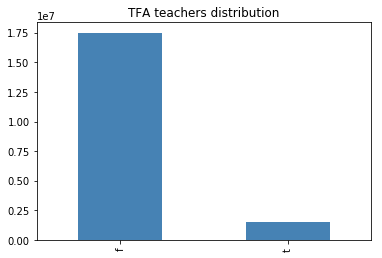

In [7]:
df['teacher_teach_for_america'].value_counts().plot.bar(title = "TFA teachers distribution", color = "steelblue")

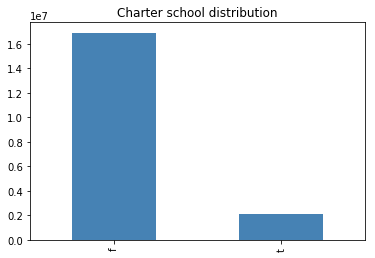

In [8]:
df['school_charter'].value_counts().plot.bar(title = "Charter school distribution", color = "steelblue")

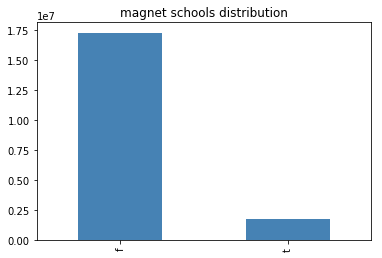

In [9]:
df['school_magnet'].value_counts().plot.bar(title = "magnet schools distribution", color = "steelblue")

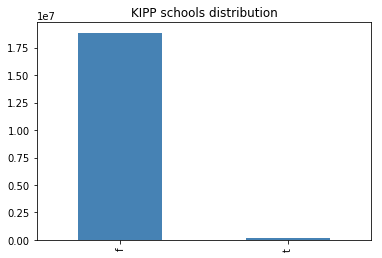

In [10]:
df['school_kipp'].value_counts().plot.bar(title = "KIPP schools distribution", color = "steelblue")

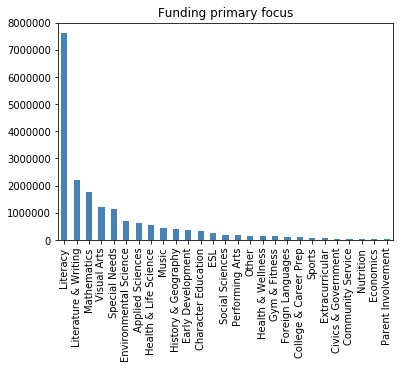

In [11]:
df['primary_focus_subject'].value_counts().plot.bar(title = "Funding primary focus", color = "steelblue")

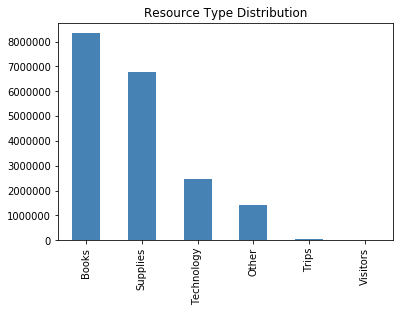

In [12]:
df['resource_type'].value_counts().plot.bar(title = "Resource Type Distribution", color = "steelblue")

In [127]:
ratio = df["resource_type"].value_counts(normalize = True)
ratio

 0    0.441675
 2    0.353399
 3    0.127196
 1    0.075494
 4    0.001824
 5    0.000343
-1    0.000069
Name: resource_type, dtype: float64

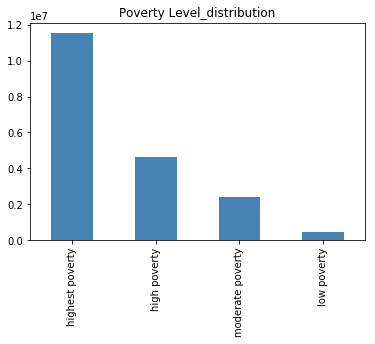

In [13]:
df['poverty_level'].value_counts().plot.bar(title = "Poverty Level_distribution", color = "steelblue")

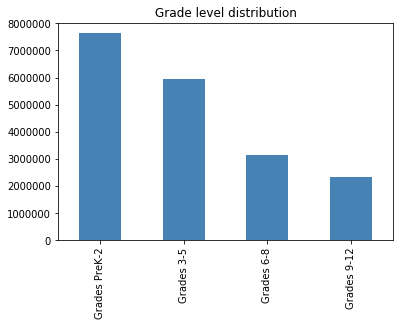

In [14]:
df['grade_level'].value_counts().plot.bar(title = "Grade level distribution", color = "steelblue")

In general, it is noticed that the data is imbalanced for true and false values. Besides, most of the projects are concentrated in Pre-K, highest-poverty regions and for the purpose of literacy.

## 2.2.2 Changes and trends over time

In this section, we want to explore the landscape and trends of grantees(schools), donors and grantmaking.

### Sum and rate of fully funded projects over year

Not only we need to learn the landscape of grantees side, we should also capture the key features of grantmaking, and donors.

In [15]:
sum_cols = ['fully_funded']
df_by_day = df[sum_cols + ['date_posted']]
df_by_day = df_by_day.replace('t', 1).replace('f', 0)
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year_sum = df_by_day.groupby('year').sum()
df_by_year_mean = df_by_day.groupby('year').mean()

<Figure size 432x288 with 0 Axes>

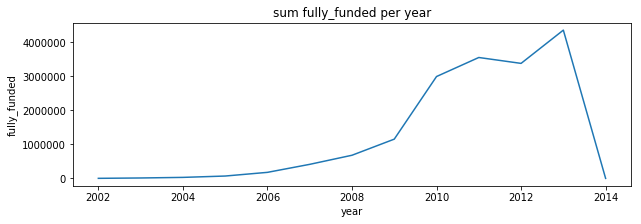

,fully_funded
year,
2002,1463.0
2003,12091.0
2004,29418.0
2005,69049.0
2006,177268.0


In [16]:
def plot_hist(df, name='mean'):
    for col in df.columns:
        plt.clf()
        plt.figure(figsize=(10, 3))
        plt.plot(df.index, df[col],'')  
        plt.xlabel('year')
        plt.ylabel(col)
        plt.title('{} {} per year'.format(name, col))
        plt.show()

plot_hist(df_by_year_sum, 'sum')
df_by_year_sum.head()

<Figure size 432x288 with 0 Axes>

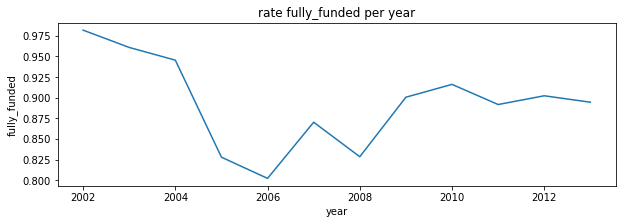

,fully_funded
year,
2002,0.981879
2003,0.960900
2004,0.945491
2005,0.827886
2006,0.802198


In [117]:
plot_hist(df_by_year_mean, 'rate')
df_by_year_mean.head()

In general, the sum of fully-funded projects increase year by year. Before 2008, the sum of fully-funded projects stablished at a low level, and there was a fluctuation for rate of fully-funded projects after it dropped dramatically in 2014. After 2008, both the sum and rate increased. However, there were sharp reversals in 2014.

### Changes and trends in grants and donors

In [17]:
mean_cols = ['donation_to_project', 'donation_optional_support', 'donation_total', 'item_quantity', 
             'total_price_including_optional_support']
df_by_day = df[mean_cols + ['date_posted']]
df_by_day = df_by_day.set_index('date_posted')
df_by_day.index = pd.to_datetime(df_by_day.index)
df_by_day['year'] = df_by_day.index.year
df_by_year = df_by_day.groupby('year').mean()
df_by_year.head()

,donation_to_project,donation_optional_support,donation_total,item_quantity,total_price_including_optional_support
year,,,,,
2002,561.368417,41.751107,603.119517,9.705750,2029.885007
2003,332.782686,46.947805,379.723427,5.484919,16771.333426
2004,262.941351,38.805454,301.746807,37.283577,774.661285
2005,214.122841,29.425803,243.550009,4.389194,752.023558
2006,180.249763,27.211696,207.465539,3.832543,902.639854


<Figure size 432x288 with 0 Axes>

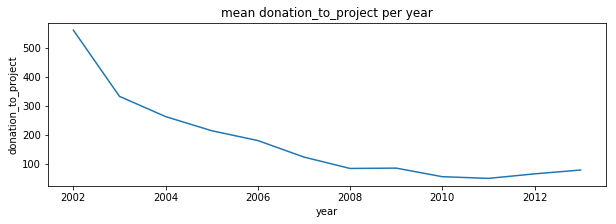

<Figure size 432x288 with 0 Axes>

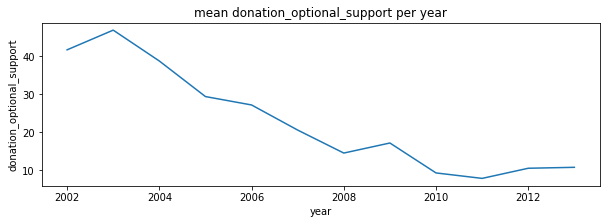

<Figure size 432x288 with 0 Axes>

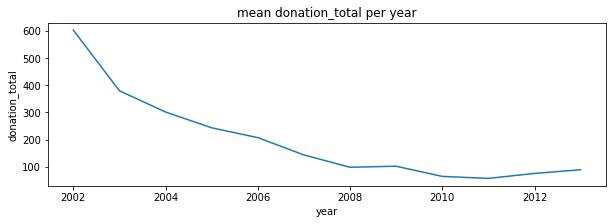

<Figure size 432x288 with 0 Axes>

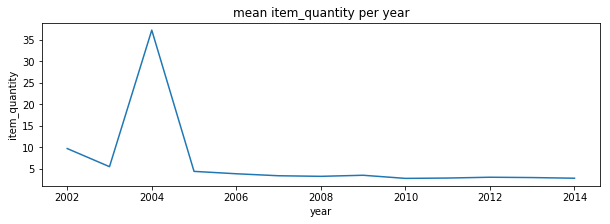

<Figure size 432x288 with 0 Axes>

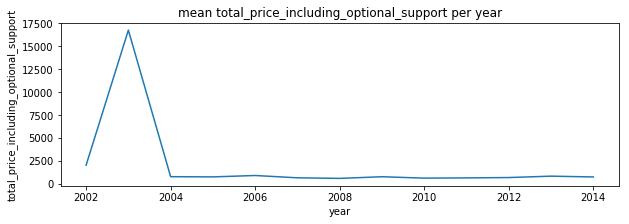

In [18]:
plot_hist(df_by_year)

There was a peak period during 2003 to 2005 for the total project costs and project items. Except for these years, the total amount of donation and project costs decrease year by year.

## 2.3 Cross-tabs

In order to further examine the relations between key factors and fully funded projects, the crosstabs would help us figure out.

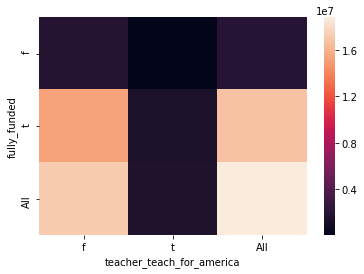

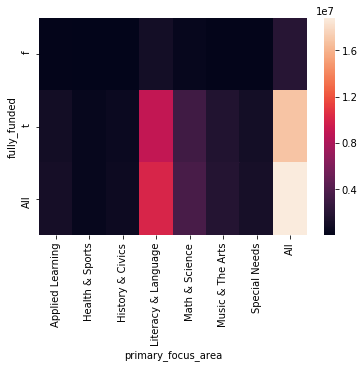

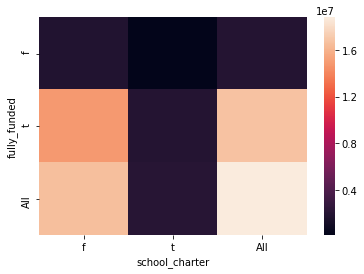

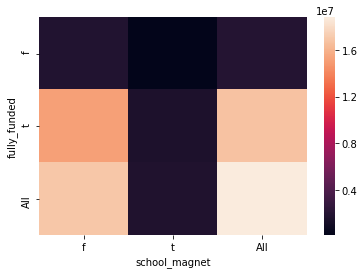

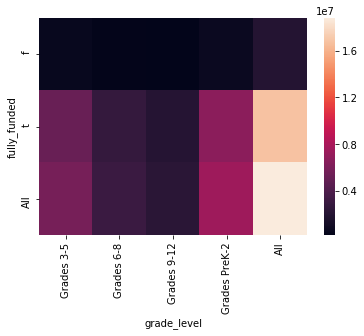

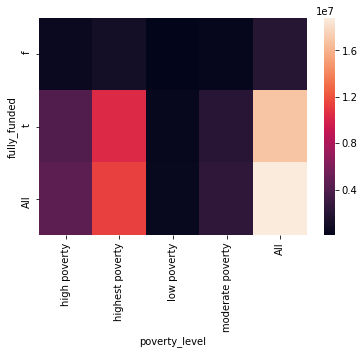

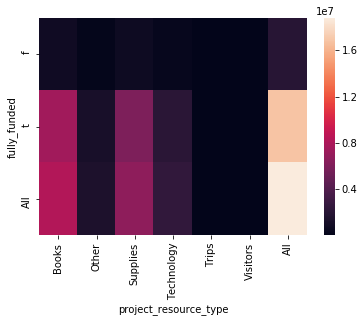

In [19]:
import seaborn as sns

def plot_crosstab(df):
    check_df = df.applymap(lambda x: isinstance(x, (int, float)))
    cols = ["teacher_teach_for_america", "primary_focus_area", "school_charter", "school_magnet", "grade_level", "poverty_level", "project_resource_type"]
    for col in cols:
        plt.clf()
        df_result = pd.crosstab(df['fully_funded'], df[col], margins=True)
        sns.heatmap(df_result, xticklabels=df_result.columns, yticklabels=df_result.index)
        plt.show()
        
 
plot_crosstab(df)

The crosstab results fit what we found in the literature review. Compared to those projects that were not fully-funded, there were more Teach for America teachers in fully funded projects. And the funding favored magnet schools and charter schools. Thirdly, most of the highest poverty schools were fully funded. They often received books, and supplies from donors.
This showed the funding went into the right direction as the Donorchoose.org's mission did.

### *Remove id columns, address and essay question entries

In order to simplify the data explorations and reduce irrelevant correlations, we select cities, counties or states as representatives of geographic features and remove all the left. IDs of teachers, schools and donors are not the only variables to demonstrate identities, so we remove id columns to reduce training time. In addition, essay questions are out of project scope and we remove them from main data.

In [21]:
df = df.replace('f', 0).replace('t', 1)
exclude_cols = ['school_latitude', 'school_longitude', 'school_zip',
               'donation_message', 'vendor_name', 'item_name', 'item_number', 'school_metro', 'payment_method']
left_cols = [col for col in df.columns if (not col.endswith('id')) and col not in exclude_cols]
df = df[left_cols]
df.head()

,school_city,school_state,school_district,school_county,school_charter,school_magnet,school_year_round,school_nlns,school_kipp,school_charter_ready_promise,...,donation_included_optional_support,payment_included_acct_credit,payment_included_campaign_gift_card,payment_included_web_purchased_gift_card,payment_was_promo_matched,via_giving_page,for_honoree,project_resource_type,item_unit_price,item_quantity
projectid,,,,,,,,,,,,,,,,,,,,,
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,3.99,2.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,9.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,29.99,1.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,7.99,6.0
00001ccc0e81598c4bd86bacb94d7acb,Chicago,IL,Pershing Elem Network,Cook,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Supplies,12.99,2.0


## 2.4 Correlations between variables

In order to investigate the dependence between multiple variables at the same time, we would like to plot a table with correlation coefficients between each variable and the others. The first step is to calculate the correlation matrix, and then plot the heatmap.

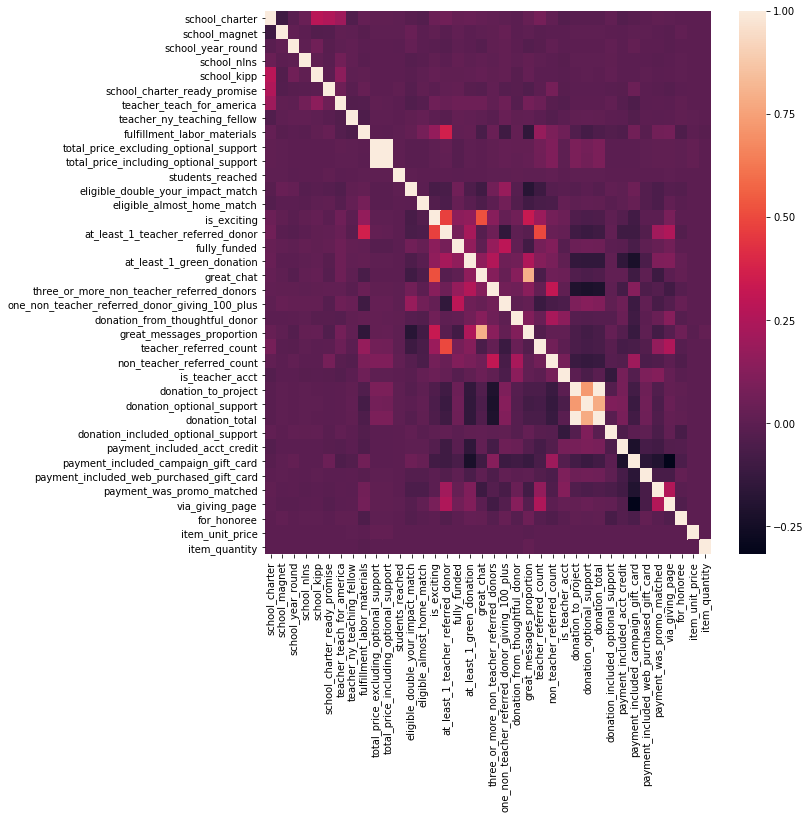

In [22]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)